In [1]:
# plot settings
options(repr.plot.width=5, repr.plot.height=4)
# install.packages("ggplot2")
library("ggplot2")

# Problem Set 8: k-Nearest-Neighbors and the variance-bias tradeoff

In polynomial regression, we use data to learn a model $y(x)$, (specifically, we learn the coefficients $\beta$) so that we may predict what $y_i$ is generated by an $x_i$. 

One challenge is choosing the proper order of polynomial. Too low-order, and you will bias the model towards a simple explanation. Too high-order, and your model will vary for slightly different input data. 

In this problem set, we observe the same variance-bias tradeoff in a different method of learning a predictive model.

## k-Nearest-Neighbors

Neutrophils are white blood cells that activate to fight infection. Active neutrophils have slightly different size and deformability compared to inactive neutrophils.  

Suppose you have build a high-throughput cell measurement tool that detects the size $x_1$ and deformability $x_2$ of cells. Suppose you have $N$ observations of $y, x_1, x_2$ where $y=1$ for active and $y=0$ for inactive cells. 

In the k-Nearest-Neighbors method, a new point $(x^n_1,x^n_2)$ has a probabilty of having $y^n=1$ given by
$$P(y^n=1) = \frac{1}{k} \sum_{i\in k \mbox{nearest}} I(y^i=1)$$
where $k \mbox{nearest}$ are the k nearest neighbors and $I(y^i=1)=1$ is the indicator function that $y^i==1$. 



,Activated,Size,Deformability
,<dbl>,<dbl>,<dbl>
330,0,-0.6378302,-0.9852829
21,1,0.9281275,1.5330313
91,1,0.1660472,0.7661376
305,0,-0.3211331,-0.6861859
366,0,-0.8210525,-0.7245032
372,0,0.6382608,-0.4527961


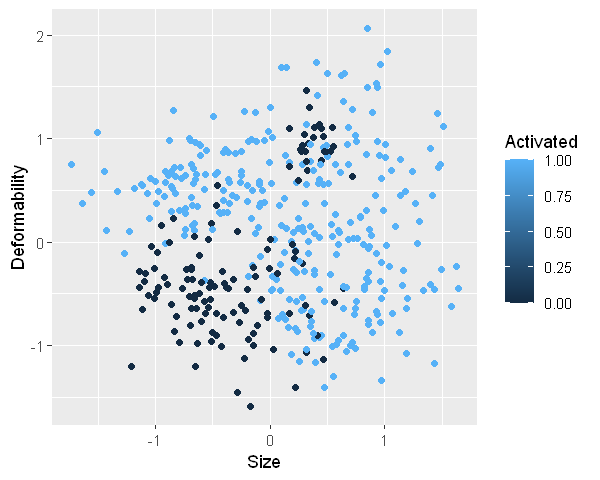

In [2]:
# Generate simulated data

# This simulation code will make a sample of size 4.25*NPerQuadrant. 
# So, if NPerQuadrant=100, then the sample size is 425. 

NPerQuadrant <- 100

x_1_mean1 <- +0.6
x_1_mean2 <- -0.6
x_1_mean3 <- +0.6
x_1_mean4 <- -0.4
x_1_mean5 <- +0.4
x_2_mean1 <- +0.6
x_2_mean2 <- +0.6
x_2_mean3 <- -0.5
x_2_mean4 <- -0.6
x_2_mean5 <- +0.9

x_1_std1 <- 0.5
x_1_std2 <- 0.4
x_1_std3 <- 0.5
x_1_std4 <- 0.5
x_1_std5 <- 0.1

x_2_std1 <- 0.6
x_2_std2 <- 0.3
x_2_std3 <- 0.4
x_2_std4 <- 0.4
x_2_std5 <- 0.2


sizes1 = rnorm(NPerQuadrant,x_1_mean1,x_1_std1)
sizes2 = rnorm(NPerQuadrant,x_1_mean2,x_1_std2)
sizes3 = rnorm(NPerQuadrant,x_1_mean3,x_1_std3)
sizes4 = rnorm(NPerQuadrant,x_1_mean4,x_1_std4)
sizes5 = rnorm(NPerQuadrant/4,x_1_mean5,x_1_std5)

deformabilities1 = rnorm(NPerQuadrant,x_2_mean1,x_2_std1)
deformabilities2 = rnorm(NPerQuadrant,x_2_mean2,x_2_std2)
deformabilities3 = rnorm(NPerQuadrant,x_2_mean3,x_2_std3)
deformabilities4 = rnorm(NPerQuadrant,x_2_mean4,x_2_std4)
deformabilities5 = rnorm(NPerQuadrant/4,x_2_mean5,x_2_std5)

sizes = c(sizes1,sizes2, sizes3,sizes4,sizes5)
deformabilities = c(deformabilities1,deformabilities2, deformabilities3,deformabilities4,deformabilities5)

activated = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))

df <- data.frame("Activated" = activated, "Size" = sizes, "Deformability" = deformabilities)

# shuffle
df <- df[sample(nrow(df)),]

head(df)

ggplot(df, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

In [3]:
# For this part, let's just choose a k value arbitrarily.

library(class)

In [4]:
testValues = cbind(runif(2000,-2,2),runif(2000,-2,2))

train.df <- df[,c("Size","Deformability")]
train.factor <- df$Activated

knn.predValues = knn(train.df, testValues, train.factor, k=1)

,Activated,Size,Deformability
,<fct>,<dbl>,<dbl>
1,1,-1.1912129,1.4337158
2,1,-0.7214045,0.4030090
3,0,-0.7646545,-0.8582411
4,1,1.4996781,1.9034086
5,1,0.8319979,0.5857411
6,1,-1.2714861,1.5357168


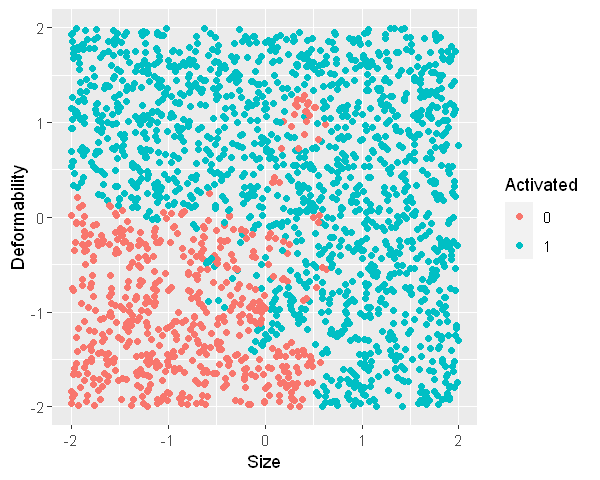

In [5]:
# plot the test results
dfTest = data.frame("Activated" = knn.predValues, "Size" = testValues[,1], "Deformability" = testValues[,2])
head(dfTest)
ggplot(dfTest, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

## Variance-bias tradeoff in kNN

This method has several advantages over, e.g., logistic regression. For example, it can more easily handle curved boundaries between the two cell types.

However, the same challenge as with polynomial regression remains: How do you choose $k$? If you choose $k$ too small, you will have a very rough boundary, and the predictions will vary if you had a slightly different sample. If you choose $k$ too large, you will bias your predictions to a smoother boundary, missing details.

For one simulated data set of size 425 (as it is currently set to do), test the kNN classifier on a uniform sample in $x_1 \in (-2.0,2.0)$ and $x_2 \in (-2.0,2.0)$ (as in the above code blocks). 

## Part 1

As our Goodness of Fit measure, we will use the __fraction of correct predictions__ (out of 425). Compute this for the above data set, with $k=1$. 

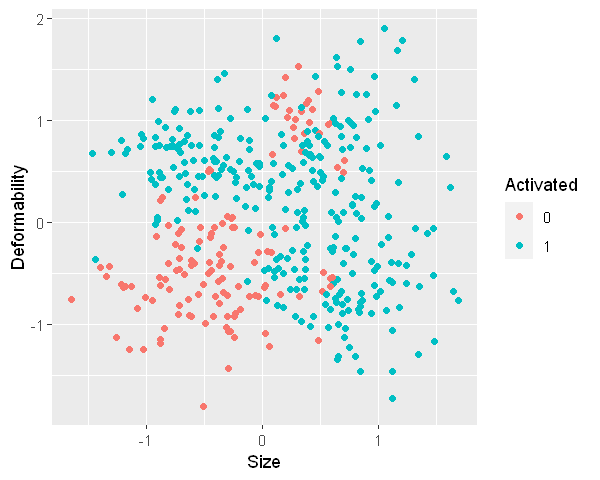

In [9]:
# generate test data
sizes1t = rnorm(NPerQuadrant,x_1_mean1,x_1_std1)
sizes2t = rnorm(NPerQuadrant,x_1_mean2,x_1_std2)
sizes3t = rnorm(NPerQuadrant,x_1_mean3,x_1_std3)
sizes4t = rnorm(NPerQuadrant,x_1_mean4,x_1_std4)
sizes5t = rnorm(NPerQuadrant/4,x_1_mean5,x_1_std5)

deformabilities1t = rnorm(NPerQuadrant,x_2_mean1,x_2_std1)
deformabilities2t = rnorm(NPerQuadrant,x_2_mean2,x_2_std2)
deformabilities3t = rnorm(NPerQuadrant,x_2_mean3,x_2_std3)
deformabilities4t = rnorm(NPerQuadrant,x_2_mean4,x_2_std4)
deformabilities5t = rnorm(NPerQuadrant/4,x_2_mean5,x_2_std5)

sizest = c(sizes1t,sizes2t, sizes3t,sizes4t,sizes5t)
deformabilitiest = c(deformabilities1t,deformabilities2t, deformabilities3t,deformabilities4t,deformabilities5t)

activatedt = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))

dft <- data.frame("Activated" = activatedt, "Size" = sizest, "Deformability" = deformabilitiest)

testValues = dft[,c("Size","Deformability")]

train.df <- df[,c("Size","Deformability")]
train.factor <- df$Activated

knn.predValues = knn(train.df, testValues, train.factor, k=1)
# plot the test results
dfTest = data.frame("Activated" = knn.predValues, "Size" = testValues[,1], "Deformability" = testValues[,2])
ggplot(dfTest, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

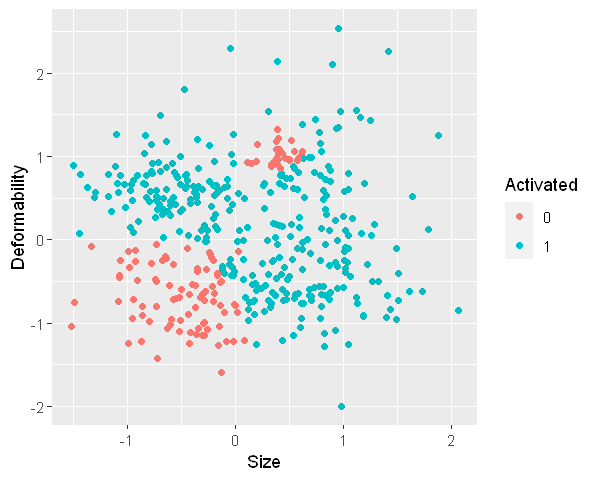

In [11]:
# generate test data
sizes1t = rnorm(NPerQuadrant,x_1_mean1,x_1_std1)
sizes2t = rnorm(NPerQuadrant,x_1_mean2,x_1_std2)
sizes3t = rnorm(NPerQuadrant,x_1_mean3,x_1_std3)
sizes4t = rnorm(NPerQuadrant,x_1_mean4,x_1_std4)
sizes5t = rnorm(NPerQuadrant/4,x_1_mean5,x_1_std5)

deformabilities1t = rnorm(NPerQuadrant,x_2_mean1,x_2_std1)
deformabilities2t = rnorm(NPerQuadrant,x_2_mean2,x_2_std2)
deformabilities3t = rnorm(NPerQuadrant,x_2_mean3,x_2_std3)
deformabilities4t = rnorm(NPerQuadrant,x_2_mean4,x_2_std4)
deformabilities5t = rnorm(NPerQuadrant/4,x_2_mean5,x_2_std5)

sizest = c(sizes1t,sizes2t, sizes3t,sizes4t,sizes5t)
deformabilitiest = c(deformabilities1t,deformabilities2t, deformabilities3t,deformabilities4t,deformabilities5t)

activatedt = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))

dft <- data.frame("Activated" = activatedt, "Size" = sizest, "Deformability" = deformabilitiest)

testValues = dft[,c("Size","Deformability")]

train.df <- df[,c("Size","Deformability")]
train.factor <- df$Activated

knn.predValues = knn(train.df, testValues, train.factor, k=15)
# plot the test results
dfTest = data.frame("Activated" = knn.predValues, "Size" = testValues[,1], "Deformability" = testValues[,2])
ggplot(dfTest, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

In [15]:
dft[,c("Activated")]

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
tab <- table(knn.predValues,dft[,c("Activated")])

In [16]:
tab

              
knn.predValues   0   1
             0  78  31
             1  47 269

In [17]:
accuracy <- function(x){
    sum(diag(x)/(sum(rowSums(x))))
}
accuracy(tab)

[1] 0.8164706

## Part 2

Still for a fixed $k$, compute the average goodness of fit for 100 repeated simulated samples, each of size 425. (Note we could not do this in real life.)

In [30]:
k<-30
sims <- seq(1,100,length=10)
gofs<-c()
for (s in sims)
{
    # generate test data
    sizes1t = rnorm(NPerQuadrant,x_1_mean1,x_1_std1)
    sizes2t = rnorm(NPerQuadrant,x_1_mean2,x_1_std2)
    sizes3t = rnorm(NPerQuadrant,x_1_mean3,x_1_std3)
    sizes4t = rnorm(NPerQuadrant,x_1_mean4,x_1_std4)
    sizes5t = rnorm(NPerQuadrant/4,x_1_mean5,x_1_std5)

    deformabilities1t = rnorm(NPerQuadrant,x_2_mean1,x_2_std1)
    deformabilities2t = rnorm(NPerQuadrant,x_2_mean2,x_2_std2)
    deformabilities3t = rnorm(NPerQuadrant,x_2_mean3,x_2_std3)
    deformabilities4t = rnorm(NPerQuadrant,x_2_mean4,x_2_std4)
    deformabilities5t = rnorm(NPerQuadrant/4,x_2_mean5,x_2_std5)

    sizest = c(sizes1t,sizes2t, sizes3t,sizes4t,sizes5t)
    deformabilitiest = c(deformabilities1t,deformabilities2t, deformabilities3t,deformabilities4t,deformabilities5t)

    activatedt = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))

    dft <- data.frame("Activated" = activatedt, "Size" = sizest, "Deformability" = deformabilitiest)

    testValues = dft[,c("Size","Deformability")]

    train.df <- df[,c("Size","Deformability")]
    train.factor <- df$Activated

    knn.predValues = knn(train.df, testValues, train.factor, k=k)
    
    tab <- table(knn.predValues,dft[,c("Activated")])

    accuracy <- function(x){sum(diag(x)/(sum(rowSums(x))))}
    gof<-accuracy(tab)
    gofs=append(gofs,gof)
}
mean(gofs)

[1] 0.8645647

## Part 3

Compute the average goodness-of-fit over 100 repeated samples, each of size 425, as above. 

First, you may do this by manually experimenting with different $k$ values. What $k$ value optimizes the goodness-of-fit?

__(Out of class part)__ Next, perform a sweep over $k=1$ to $k=200$. Plot Goodness-of-fit versus $k$. What is the $k$ value that optimizes goodness-of-fit?


In [4]:
ks<-seq(1,100,length=10)
averages<-c()
for (k in ks)
{
sims <- seq(1,100,length=100)
gofs<-c()
for (s in sims)
{
    # generate test data
    sizes1t = rnorm(NPerQuadrant,x_1_mean1,x_1_std1)
    sizes2t = rnorm(NPerQuadrant,x_1_mean2,x_1_std2)
    sizes3t = rnorm(NPerQuadrant,x_1_mean3,x_1_std3)
    sizes4t = rnorm(NPerQuadrant,x_1_mean4,x_1_std4)
    sizes5t = rnorm(NPerQuadrant/4,x_1_mean5,x_1_std5)

    deformabilities1t = rnorm(NPerQuadrant,x_2_mean1,x_2_std1)
    deformabilities2t = rnorm(NPerQuadrant,x_2_mean2,x_2_std2)
    deformabilities3t = rnorm(NPerQuadrant,x_2_mean3,x_2_std3)
    deformabilities4t = rnorm(NPerQuadrant,x_2_mean4,x_2_std4)
    deformabilities5t = rnorm(NPerQuadrant/4,x_2_mean5,x_2_std5)

    sizest = c(sizes1t,sizes2t, sizes3t,sizes4t,sizes5t)
    deformabilitiest = c(deformabilities1t,deformabilities2t, deformabilities3t,deformabilities4t,deformabilities5t)

    activatedt = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))

    dft <- data.frame("Activated" = activatedt, "Size" = sizest, "Deformability" = deformabilitiest)

    testValues = dft[,c("Size","Deformability")]

    train.df <- df[,c("Size","Deformability")]
    train.factor <- df$Activated

    knn.predValues = knn(train.df, testValues, train.factor, k=k)
    
    tab <- table(knn.predValues,dft[,c("Activated")])

    accuracy <- function(x){sum(diag(x)/(sum(rowSums(x))))}
    gof<-accuracy(tab)
    gofs=append(gofs,gof)
}
averages=append(averages,mean(gofs))
}


In [5]:
averages

[1] 0.8196471 0.8592941 0.8618353 0.8617882 0.8529882 0.8457412 0.8440000
 [8] 0.8428235 0.8465176 0.8461176

,Activated,Size,Deformability
,<fct>,<dbl>,<dbl>
1,1,0.3573945,0.84905378
2,1,0.4531398,1.42936470
3,1,1.9185471,-0.08283949
4,1,-0.1831551,0.13212380
5,1,1.1085881,0.05927047
6,1,0.1790779,1.33299765


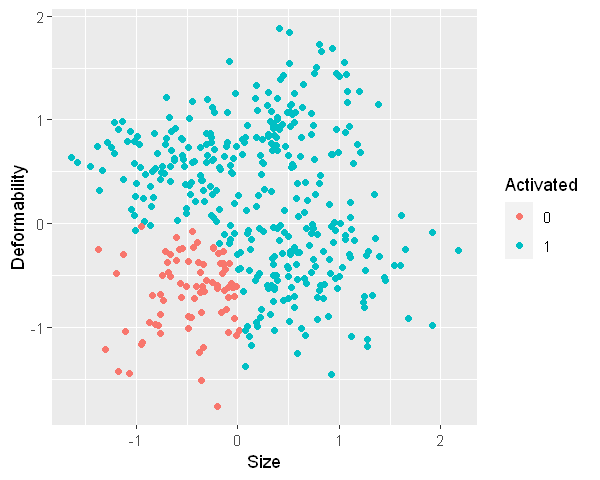

In [6]:
# plot the test results
dfTest = data.frame("Activated" = knn.predValues, "Size" = testValues[,1], "Deformability" = testValues[,2])
ggplot(dfTest, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

## Part 4

The function knn has a built-in feature do perform cross-validation. Read the knn function documentation. Perform cross-validation over a range of $k=1$ to $k=200$. Pick whatever you want for splitting the data into a training set and validation set.

What value of $k$ optimized goodness-of-fit according to cross-validation?

Does it agree with the value of $k$ found in Part 3?